<a href="https://colab.research.google.com/github/neketa708/AlGORITM1/blob/main/ETLdz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.
2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.
3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/fifa_s2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

Удалим ненужные колонки и недостающие значения

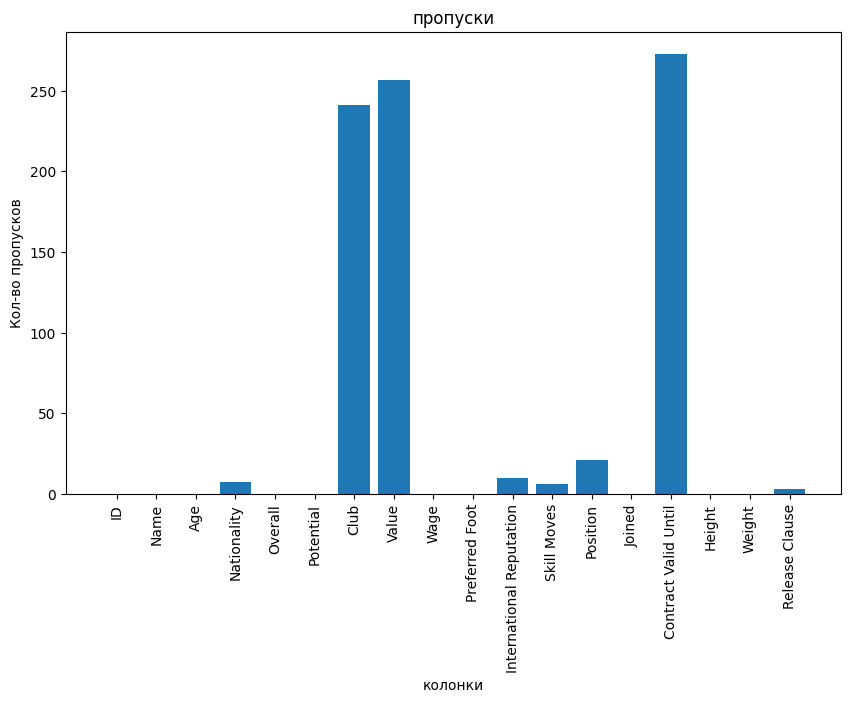

In [88]:
omiss = df.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(omiss.index, omiss.values)
plt.xlabel('колонки')
plt.xticks(rotation=90)
plt.ylabel('Кол-во пропусков')
plt.title('пропуски')
plt.show()

In [89]:
df.drop(columns=['Value', 'Contract Valid Until'], inplace=True)

In [90]:
df.dropna(inplace=True)
df.shape

(2117, 16)

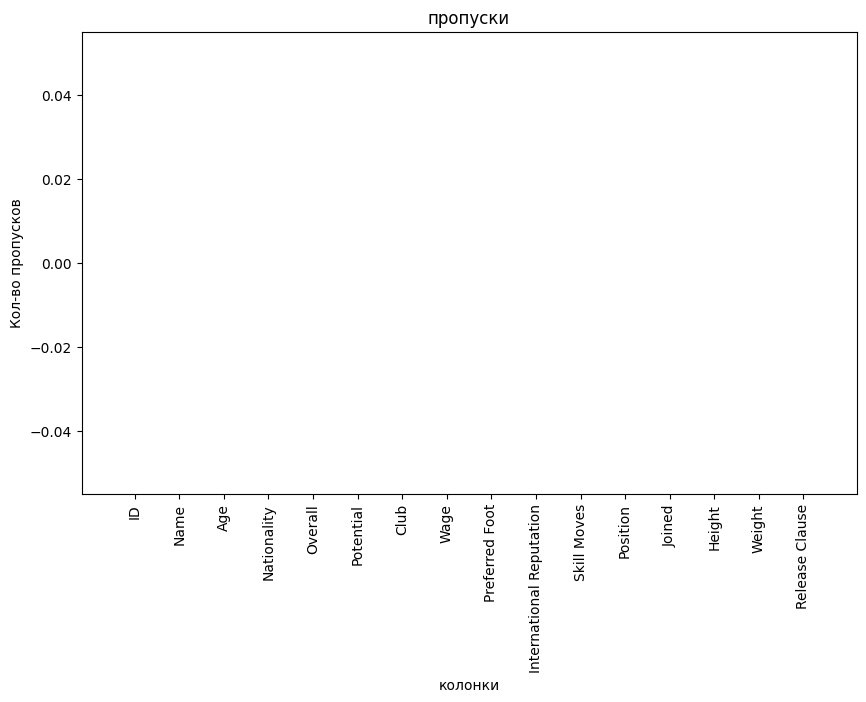

In [91]:
omiss = df.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(omiss.index, omiss.values)
plt.xlabel('колонки')
plt.xticks(rotation=90)
plt.ylabel('Кол-во пропусков')
plt.title('пропуски')
plt.show()

 Удаляем дубликаты

In [92]:
df['Club'] = df.Club.str.lower()
df['Nationality'] = df.Nationality.str.lower()
df['Name'] = df.Name.str.lower()
df['Position'] = df.Position.str.lower()
Dup_Rows = df[df.duplicated()]
print("\n\nПовторяющиеся строки : \n {}".format(Dup_Rows))



Повторяющиеся строки : 
          ID        Name  Age Nationality  Overall  Potential          Club  \
154  168651  i. rakitić   30     croatia       87         87  fc barcelona   
304  181872    a. vidal   31       chile       85         85  fc barcelona   

     Wage Preferred Foot  International Reputation  Skill Moves Position  \
154   260          Right                       4.0          3.0      rcm   
304   205          Right                       4.0          3.0      cam   

     Joined    Height  Weight  Release Clause  
154    2014  6.000000   172.0         95300.0  
304    2018  5.916667   165.0         53300.0  


добавим колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36

In [93]:
def old(age):
  if age < 20:
    return('до 20')
  if age>20 and age<30:
    return('от 20 до 30')
  if age>30 and age<36:
    return('от 30 до 36')
  if age>36:
    return('старше 36')

In [112]:
df['Old'] = df['Age'].apply(old)

In [113]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Old
0,1179,g. buffon,40,italy,88,88,paris saint-germain,77,Right,4.0,1.0,gk,2018,6.333333,203.0,7400.0,старше 36
2,8205,braga,35,portugal,70,70,cd aves,5,Right,1.0,3.0,lcm,2017,5.916667,165.0,1600.0,от 30 до 36
3,9014,a. robben,34,netherlands,84,84,fc bayern münchen,110,Left,4.0,4.0,rm,2009,5.916667,176.0,25600.0,от 30 до 36
4,19521,j. ibehre,35,england,61,61,cambridge united,2,Right,1.0,2.0,st,2017,6.333333,203.0,210.0,от 30 до 36
5,20209,ricardo costa,37,portugal,74,74,cd tondela,4,Right,2.0,2.0,lcb,2017,6.000000,181.0,1600.0,старше 36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,guerrero,16,spain,63,76,cf rayo majadahonda,1,Left,1.0,3.0,cm,2018,5.916667,165.0,1400.0,до 20
2395,246594,h. massengo,16,france,62,75,as monaco,2,Right,1.0,2.0,cdm,2018,5.833333,146.0,1100.0,до 20
2396,246599,guillem jaime,19,spain,64,80,fc barcelona,13,Right,1.0,3.0,rw,2018,5.833333,154.0,2600.0,до 20
2397,246606,fran garcía,18,spain,64,79,real madrid,9,Left,1.0,2.0,lb,2018,5.583333,139.0,2200.0,до 20
